In [29]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
import numpy as np
from scipy.signal import find_peaks

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [30]:
df_raw = pd.read_csv('dataset/electricity.csv')
scaler = StandardScaler()
cols_data = df_raw.columns[1:]
df_data = df_raw[cols_data]

train_data = df_data
scaler.fit(train_data.values)
data = scaler.transform(df_data.values)

train_data = data[:365*24]
test_data = data[400*24:500*24]

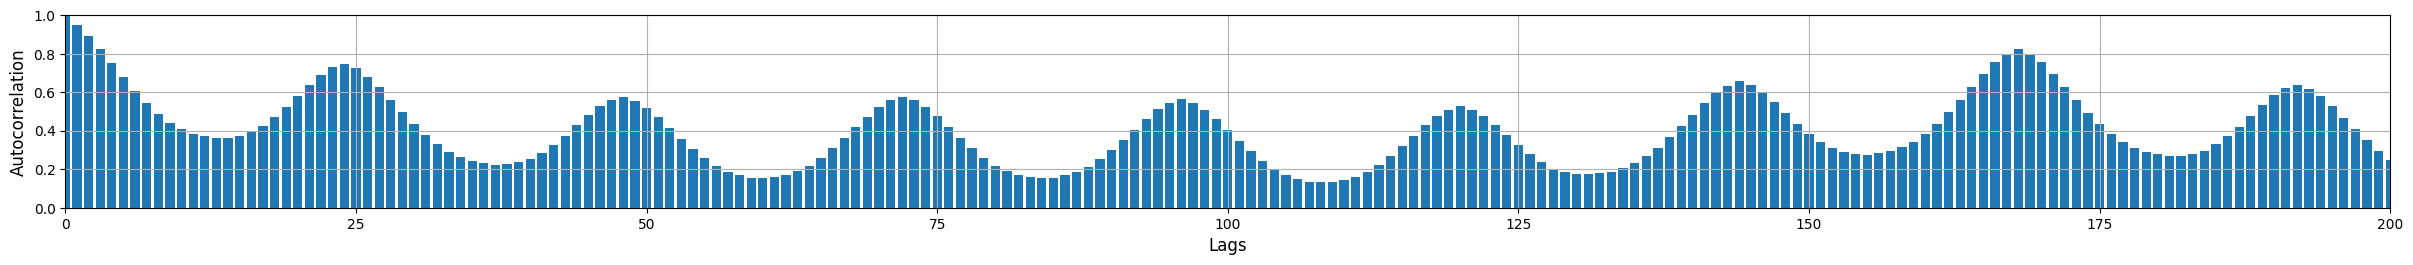

In [38]:
# Calculate autocorrelation coefficients
acf_values = acf(train_data[:,-1], nlags=3600)

# Plot the bar chart
lags = np.arange(len(acf_values))
plt.figure(figsize=(30, 2.5))
plt.bar(lags, acf_values)  # use bar plot

plt.xlim([0, 200])
plt.ylim([0, 1])

plt.xlabel("Lags", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

plt.grid(True)
plt.savefig('autocorrelation.png', bbox_inches='tight', dpi=1200)

In [39]:
# Find peaks in autocorrelation function
peaks, _ = find_peaks(acf_values)
acf_value_max = np.max(acf_values[peaks])
print("Max autocorrelation: ", acf_value_max)

# Identify the lag corresponding to the highest peak
for i, peak in enumerate(peaks):
    if acf_values[peak] == acf_value_max:
        print("Peak at lag: ", peak)

Max autocorrelation:  0.8234976953558654
Peak at lag:  168
